In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CP_ALS3 as cp

## Sparse Random Tensor

In [5]:
%%time
init_shape = (17, 16, 15)
coo, vals = cp.coo_tensor_gen(init_shape, density=0.02)
assert cp.check_coo_tensor(coo)!= "Bad"

CPU times: user 873 µs, sys: 0 ns, total: 873 µs
Wall time: 879 µs


In [6]:
coo.shape[0]

81

In [9]:
%%time
max_iter = 10
rank = 210
a, b, c, err = cp.cp_als3(coo, vals, init_shape, rank=rank, max_iter=max_iter)

iterations over
CPU times: user 991 ms, sys: 16.4 ms, total: 1.01 s
Wall time: 516 ms


In [10]:
error = cp.sqrt_err(coo, vals, init_shape, a, b, c)
rerror = cp.sqrt_err_relative(coo, vals, init_shape, a, b, c)
print(f"Abs err = {error};\nRel err = {rerror};")

Abs err = 7.176900773916972e-05;
Rel err = 1.378600216982924e-05;


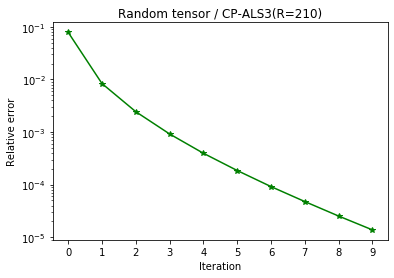

In [11]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'g-*')

## Hilbert Tensor

In [14]:
hilbert_shape = (3, 3, 3)
coo, vals = cp.gen_hilbert_tensor(hilbert_shape)

In [15]:
coo.shape

(27, 3)

In [19]:
%%time
max_iter = 10
rank = 6
a, b, c, err = cp.cp_als3(coo, vals, hilbert_shape, rank=rank, max_iter=max_iter)

iterations over
CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 1.45 ms


In [20]:
rerror = cp.sqrt_err_relative(coo, vals, hilbert_shape, a, b, c)
print(f"Rel err = {rerror};")

Rel err = 0.0005799700328285535;


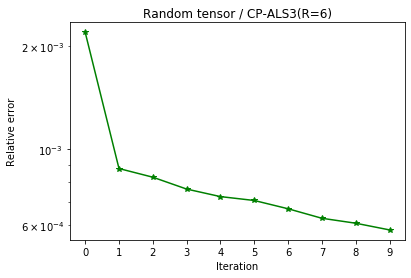

In [21]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'g-*')

In [185]:
minima = 200
for i in range(rank):
    for j in range(rank):
        for k in range(rank):
            for m in range(rank):
                for n in range(rank):
                    for z in range(rank):
                            slicer = [i, j, k, m, n, z]
                            rerror = cp.sqrt_err_relative(
                                coo,
                                vals,
                                27,
                                (3, 3, 3),
                                a[:, slicer],
                                b[:, slicer],
                                c[:, slicer],
                            )
                            if rerror <= minima:
                                minima = rerror
                                params = [i, j, k, m, n, z]
                                params.sort()

print(f"Rel err = {minima}; {params}")

Rel err = 8.883885805668126e-05; [0, 1, 2, 3, 4, 5]
